1-1 
붓꽃의 품종분류  
붓꽃을 setosa, versicolor, virginica 3종으로 분류한 붓꽃의 측정 데이터가있다.  
붓꽃의 품종을 정확하게 분류한 데이터가 있다.  
여기서 품종을 하나 선택하는 문제(분류=classification)  
출력될수 있는 값 = 붓꽃의 종류를 class라고한다.  
데이터 포인트 하나(sample하나, 붓꽃 하나)에 대한 기대 출력은 꽃의 품종인데  
이떄 이런 특정 데이터 포인트에 대한 출력, 즉 품종을 라벨(label)이라고 한다.  

In [1]:
from sklearn.datasets import load_iris
iris_dataset=load_iris()

In [2]:
#data가 dict와 유사하게 key와 value로 구성. (bunch 클래스)
print("iris_dataset의 키:\n",iris_dataset.keys())

iris_dataset의 키:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [4]:
print(iris_dataset)
"""출력해 보면 각각의 data point 의 features는
iris_dataset['data']에 numpy array 의 형태로 저장되어있고
label은 iris_dataset['target'] 에 들어있으며
특성명은 iris_dataset['feature_names']에 저장되어 있다."""

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

"출력해 보면 각각의 data point 의 features는\niris_dataset['data']에 numpy array 의 형태로 저장되어있고\nlabel은 iris_dataset['target'] 에 들어있으며\n특성명은 iris_dataset['feature_names']에 저장되어 있다."

In [5]:
#시각화 편하게 pandas 로 바꿔보자
import pandas as pd
import numpy as np
#'target'의 shape가 (150,)의 형태(=1차원)이고
#'data'의 shape가 (150,4)의 형태(=2차원)이므로
# 차원을 맞춰줘야 np.hstack으로 병합할 수 있어서 target을 150,1 형태로 바꾼다.
target_temp=iris_dataset['target'].reshape(-1,1)
temp_iris=np.hstack((iris_dataset['data'],target_temp))

#컬럼이름을 정할떄 iris_dataset['feature_names']의 형태가 list여서
#컬럼명 하나를 추가하려면 []로 감싼 형태의 str을 더해줘야한다.
#컬럼명을 list 형태로 받기 떄문에
iris=pd.DataFrame(temp_iris,columns=iris_dataset['feature_names']+['kind'])

#iris kind값을 target name 으로 바꾸기 편하게 타입 변경
#iris_dataset['target_name]에서 indexing 할때 0.0 같은 값을
#사용하면 indexing 이 안됨.
iris['kind']=iris['kind'].astype(int)

In [6]:
# ML을 통한 학습을 위해서는 굳이 kind를 이름으로 확인할 필요는 없지만
# 한번 각 숫자의 할당된 target names를 반영한 data frame을 살펴보자.

iris_for_targetname=iris.copy()
for i in range(150):
  iris_for_targetname.iloc[i,-1]=iris_dataset['target_names'][iris_for_targetname.iloc[i,-1]]

In [7]:
iris.head()
#아래보이는 각 붓꽃의 data point (행) = sample 이라고 하고
#각 컬럼을 "특성(feature)"라고 부른다.
#따로 추가한 마지막 열(target)은 label이다.

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kind
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
iris_for_targetname.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),kind
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
#위의 data를 이용해서 붓꽃의 품종을 예측해 보자.
"""우리는 위 데이터로 머신러닝 모델을 만들고
새로운 데이터의 품종을 예측할 것이다.
하지만 모델을 새 데이터에 적용하기 전에 이 모델이
정말 잘 작동하는가?를 알아야 한다.
다시 말해 우리가 만든 모델의 예측이 신뢰가능한지 알아야한다,
"""

"""
Unfortunately, We can't use train data to evaluate our model.
모델이 훈련데이터를 통째로 기억해서 훈련데이터 안의 어떤 데이터도
정확하게 맞출수 있기 떄문이다.
이렇게 훈련데이터를 정확하게 잘 기억한다는것 (완전 맞춤)
은 모델이 잘 일반화되지 않았다는 것이다.(Overfitted)
다른말로는 새로운 데이터에 대해서 잘 작동하지 않는다는 뜻이다.
"""

"\nUnfortunately, We can't use train data to evaluate our model.\n모델이 훈련데이터를 통째로 기억해서 훈련데이터 안의 어떤 데이터도\n정확하게 맞출수 있기 떄문이다.\n이렇게 훈련데이터를 정확하게 잘 기억한다는것 (완전 맞춤)\n은 모델이 잘 일반화되지 않았다는 것이다.(Overfitted)\n다른말로는 새로운 데이터에 대해서 잘 작동하지 않는다는 뜻이다.\n"

In [15]:
#우리는 model이 잘 작동하는지 검증하기 위해
#dataset을 traing set과 test set(=hold out set) 으로 나눌것이다.
from sklearn.model_selection import train_test_split
#일반적으로 우리는 data를 대문자 X, labl을 소문자 y로 표시한다.
X=iris.drop('kind',axis=1) #kind를 제외한 features data
y=iris['kind'] # kind = label data

#전체 iris데이터에서 train : test = 0.75 : 0.25로 나눠서
#아래 지정한 변수명으로 데이터를 할당한다.
#pseudo random의 seed number를 332로 지정
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=332)

In [17]:
#data를 활용할때 항상 data의 shape를 잘 확인해야 한다.
# label data는 (n,)의 shape여야하는 경우가 많음. (1차원)
print(f"X_train의 크기 = {X_train.shape}")
print(f"y_train의 크기 = {y_train.shape}")
print(f"X_test의 크기 = {X_test.shape}")
print(f"y_test의 크기 = {y_test.shape}")

X_train의 크기 = (112, 4)
y_train의 크기 = (112,)
X_test의 크기 = (38, 4)
y_test의 크기 = (38,)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f199c043250>,
      dtype=object)

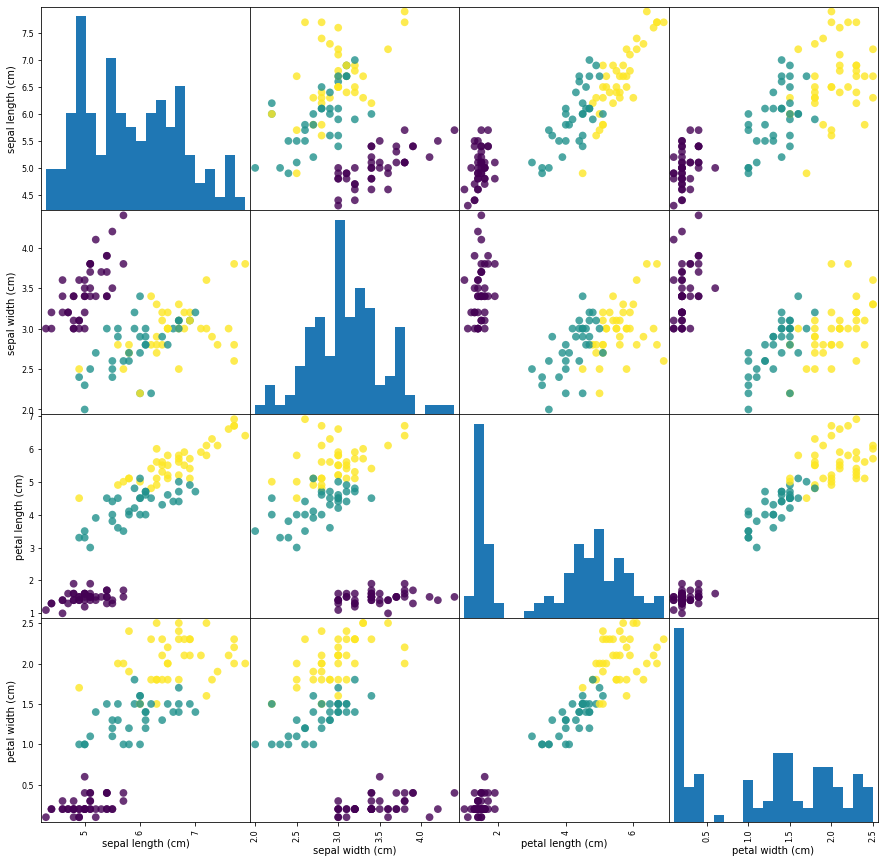

In [26]:
#data에 하자가 없느지 미리 살펴보면서
#필요한 data가 누락되진 않았는지,
#머신러닝이 아니여도 충분히 풀만한 문제인지
#비정상적이거나 특이한 값, 결측치, 단위가 이상한값 등이 없는지?
#등을 찾아봐야한다.
#pandas의 summurize나 sns나 matplotlib를 이용한
#boxplot, or scatter matrix등을 이용한 visualization도 있다.

#3개 이상의 특성을 동시에 표현하기는 조금 힘듦,
#따라서 각각의 특성을 두개씩 짝지어서 표현하는
#scatter plot이 유용한 방법중 하나임,
#But 모든 특성의 관계가 나타나는것은 아니므로
#다각도에서 살펴봐야함.
pd.plotting.scatter_matrix(X_train,c=y_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,
                           alpha=.8)
#alpah=투명도, c=표시되는 점의 색깔값 기준, bins=histogram 구간 개수, s

#더 자세한 정보는 이분 블로그 참조~
#https://yganalyst.github.io/etc/visual_1/

In [33]:
#가장 simple 한 classification 모델인 KNN 모델을 사용해서 분류해보자!
""" 이 알고리즘은 예측하고가 하는 data point에서 가장 가까운
k개의 이웃을 통해 data point의 label을 예측하는 방법이다.
k개의 이웃중 가장 빈도숫가 높은 값을 data point의 class로 활용한다.
"""
#sklearn의 모든 머신러닝 모델은 Estimator라는 python class로 구현되어있다.

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

#knn은 훈련 data의 정보를 모두 기억하고있어야한다.
#simple하면서도 빠른 알고리즘이지만
#data가 so much해지면 model자체도 heavy해진다는 단점과
#train data를 자체적으로 저장해서 기억하기 때문이다.
#한번의 예측마다 모든 train data와의 비교를 실행해야하기에 속도가 느려진다.
#학습은 빠르나 예측이 느려질 수 있음.

In [44]:
knn.fit(X_train,y_train)
#많은 머신러닝, 딥러닝 모델에서
#다양한 hyper parameter를 가지고 있지만 모두 신경쓸 필요는 없다.
#대부분 성능을 최적화 하거나 특별한 목적으로 사용하기 떄문

"""간단하게 말하면 하이퍼 파라미터란 모델에서 사용자가 직접 설정하는
모든값을 말한다. batch_size, iteration, 각종 수식의 값들, epochs,
learning rate등등 매우 다양하다.

단순한 parameter는 모델 자체에서 data에 의해 정해지는 값을 말한다.
weight나 bias등."""

"""python 함수에서 parameter/argument와는 별개의 이야기이다.
이는 아래 링크 참고,
http://taewan.kim/tip/argument_parameter/"""

'python 함수에서 parameter/argument와는 별개의 이야기이다.\n이는 아래 링크 참고,\nhttp://taewan.kim/tip/argument_parameter/'

In [48]:
#임의의 붓꽃 sample값을 하나 만들어 class를 예측해봅시다.
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f"X_new.shape:{X_new.shape}")
#model이 input으로 받을 값은 항상 2차원배열이어야 한다.

X_new.shape:(1, 4)


In [56]:
prediction = knn.predict(X_new)
print(f"예측:{prediction}")
print(f"예측한 타깃의 이름:{iris_dataset['target_names'][prediction]}")

예측:[0]
예측한 타깃의 이름:['setosa']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [57]:
#미리 분리해놓은 test set을 이용해 모델이 얼마나 잘 맞추는지
# 정확도를 계산해보자
y_pred = knn.predict(X_test)
print(f"테스트 세트에 대한 예측값 : \n{y_pred}")

테스트 세트에 대한 예측값 : 
[2 0 1 1 0 2 2 1 1 0 0 0 1 1 2 1 2 1 2 0 2 1 1 2 2 1 1 1 0 1 2 0 1 1 0 2 2
 1]


In [60]:
#직접 np행렬 계산을 통해 예측값 비교
print(f"테스트 세트에 대한 정확도 {np.mean(y_pred==y_test):.2f}")

#model의 score method 를 통해 평가
print(f"테스트 세트에 대한 정확도 {knn.score(X_test,y_test):.2f}")

테스트 세트에 대한 정확도 0.95
테스트 세트에 대한 정확도 0.95
